# Discussion 6 : Regression Confidence Intervals and Feature Generation

*Note* : Please review the multiple regression section of [Discussion 5](https://colab.research.google.com/github/stanford-mse-125/section/blob/main/Discussions/Discussion_5_answers.ipynb) if you haven't already to make sure you're comfortable with these topics before moving onto this Discussion.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

/Users/samitakamath/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/samitakamath/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


This week we'll return to our `scores` dataset and the problem of predicting final scores from homework scores.

In [2]:
scores = pd.read_csv("https://raw.githubusercontent.com/stanford-policylab/mse125/main/week_5/scores.csv")

## Uncertainty in Regression

Recall that linear regression is just a model with a
single explanatory variable, where we are trying to find the "best fitting" line
through the points to represent the relationship between the covariate (or the predictor) and the outcome (or the response).

Recall from the lecture [demo](https://colab.research.google.com/github/stanford-mse-125/demos/blob/main/regression-uncertainty.ipynb) that there is randomness in our estimator due
to the fact that we only get to observe samples of the population, but never the
whole population (remember the "sampling distribution").
We have to deal with similar uncertainty here. While we may be able to find the "best" coefficients
that fit our data, we need to also measure how (un)certain we are about our
estimated coefficient, and thereby the resulting prediction.

We can consider the $\hat{\beta}$ coefficients to be random variables normally
distributed around the true $\beta$, where the randomness comes from the sample
on which we happen to fit our model. Recall the properties of the estimator from lecture.


$\hat \beta_1 = \rho(x,y) \hat \sigma_y / \hat \sigma_x, \qquad \hat \beta_0 = \bar y - \hat \beta_1 \bar x$

where 
- $\rho(x,y)$ is the correlation between $x$ and $y$
- $\hat \sigma_x$ and $\hat \sigma_y$ are the sample standard deviations of $x$ and $y$
- $\bar x$ and $\bar y$ are the sample means of $x$ and $y$

under the normal model 

$y_i = \beta_0 + \beta_1 x_i + \epsilon_i, \qquad \epsilon_i \sim N(0, \sigma^2)$ 

These estimates are unbiased:

$E[\hat \beta_1] = \beta_1, \qquad E[\hat \beta_0] = \beta_0$



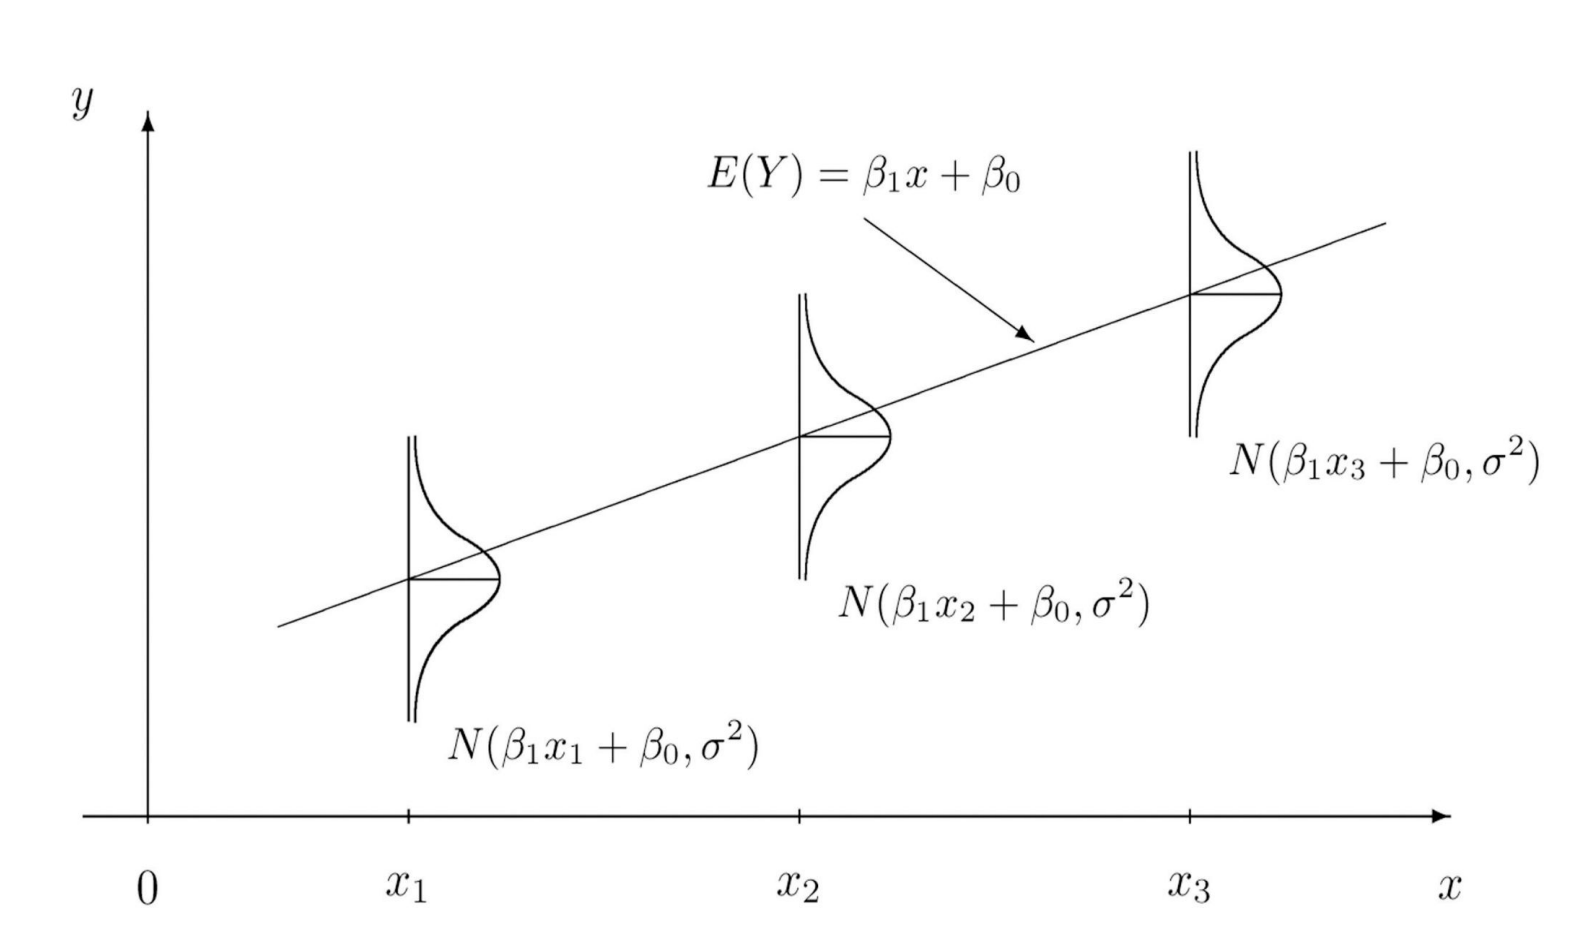

We are able to see the standard error of our $\beta$ estimators from the 
regression summary table below.

In [3]:
X = sm.add_constant(scores["hw1"])
y = scores["final"]
lm_0 = sm.OLS(y, X).fit()
print(lm_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  final   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     53.99
Date:                Wed, 10 May 2023   Prob (F-statistic):           6.08e-11
Time:                        13:44:13   Log-Likelihood:                -386.01
No. Observations:                 100   AIC:                             776.0
Df Residuals:                      98   BIC:                             781.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1007      9.916      0.918      0.3

/Users/samitakamath/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


We can use *confidence intervals* and *prediction intervals* to quantify (un)certainty in our estimates and the resulting predictions. A confidence interval tells us how sure we are about the mean prediction given $X$, while a prediction interval tells quantifies how confident we are about a specific prediction given $X$. Unlike the confidence interval, the prediction interval accounts for both the uncertainty in the predicted mean and the inherent variability of individual observations.

We can generate the 95% confidence interval for our fitted parameters $\hat\beta$ using the `conf_int` function.

In [4]:
lm_0.conf_int(alpha=0.05, cols=None)

,0,1
const,-10.577395,28.778706
hw1,0.599302,1.042803


Let's say we scored 80 on `hw1`. To generate a predicted final score and capture the uncertainty from our simple linear regression model we could do the following: 

In [5]:
lm_0.get_prediction(np.array([[1, 80]])).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,74.784844,1.473612,71.86051,77.709179,51.574834,97.994855


`mean`: This column represents the predicted mean value for the final score.

`mean_se`: It provides the standard errors associated with the predicted means. These standard errors capture the uncertainty in the predicted mean values.

`mean_ci_lower` and `mean_ci_upper`: These columns give the lower and upper bounds of the confidence interval for the predicted mean. The confidence interval represents the range within which the true mean is expected to fall with a certain level of confidence.

`obs_ci_lower` and `obs_ci_upper`: These columns provide the lower and upper bounds of the prediction interval. The prediction interval represents the range within which individual observations are expected to fall with a certain level of confidence. 

**Exercise**: Explain why prediction intervals are much wider than mean confidence intervals in the context of regression. 

Unlike the confidence interval, the prediction interval accounts for both the uncertainty in the predicted mean and the inherent variability of individual observations, which leads them to be wider typically than CIs.

#### Visualizing Confidence Intervals
The `sns.regplot` function from the Seaborn library can be used to visualize a scatter plot with a fitted regression line. By default, it also includes a shaded confidence interval around the regression line.

<AxesSubplot:xlabel='hw1', ylabel='final'>

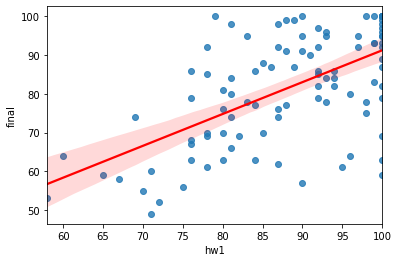

In [6]:
sns.regplot(data=scores, x="hw1", y="final", line_kws={"color": "red"})

**Exercise**: We use a simple linear regression model for the ease of visualization only, but we can similarly calculate the confidence interval and prediction interval for regression models with multiple covariates. Fit a multiple linear regression model with `hw1`, `hw2`, and `hw3` as predictors and generate 95% confidence and prediction intervals for our predicted final score if we scored **100, 85, and 95,** on the first 3 homeworks.

In [7]:
X = sm.add_constant(scores[["hw1", "hw2", "hw3"]])
y = scores["final"]
lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  final   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     26.05
Date:                Wed, 10 May 2023   Prob (F-statistic):           2.05e-12
Time:                        13:44:13   Log-Likelihood:                -378.17
No. Observations:                 100   AIC:                             764.3
Df Residuals:                      96   BIC:                             774.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6825     10.768      0.342      0.7

/Users/samitakamath/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [8]:
lm_1.get_prediction(np.array([[1, 100, 85, 95]])).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,91.162043,2.557542,86.085363,96.238723,69.055668,113.268418


The confidence interval is [86.085363, 96.238723] and the prediction interval is [69.055668,113.268418].

## Feature Generation

In regression analysis, generating features involves creating new variables or transformations of existing variables that can potentially improve the predictive power of the regression model. To get some hands-on experience with feature generation, we're going to work with the `Wage` dataset.

In [9]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [10]:
wage = pd.read_csv("https://raw.githubusercontent.com/stanford-mse-125/section/main/Discussions/data/wage.csv")

In [11]:
wage

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


#### Polynomial regression

Historically, the standard way to extend linear regression to settings in which the relationship between the predictors and the response is nonlinear has been to replace the standard linear model

\begin{align}
y_i = \beta_0 + \beta_1x_i + \epsilon_i
\end{align}

with a polynomial function

\begin{align}
y_i = \beta_0 + \beta_1x_i + \beta_2x^2_i + \beta_3x^3_i + ... + \beta_dx^d_i + \epsilon_i
\end{align}

where $\epsilon_i$ is the error term. This approach is known as polynomial regression and allows us to capture non-linear relationships between the x and y variables. The degree of the polynomial, represented by n, determines the flexibility of the curve and the complexity of the model. A polynomial of degree 1 represents a simple linear relationship, while higher-degree polynomials introduce curvature and nonlinearity.

Let's experiment with polynomial transformations of `age` in the `wage` data. Note that we're switching from `sm.OLS` to `smf.ols` syntax here.

In [12]:
model1 = smf.ols(formula='wage ~ 1 + age', data=wage).fit()
rmse(model1.predict(wage), wage['wage'])

40.91542539005824

<AxesSubplot:xlabel='age', ylabel='wage'>

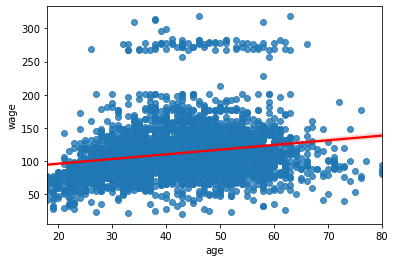

In [13]:
# Linear fit
sns.regplot(data=wage, x="age", y="wage", line_kws={"color": "red"})

/Users/samitakamath/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


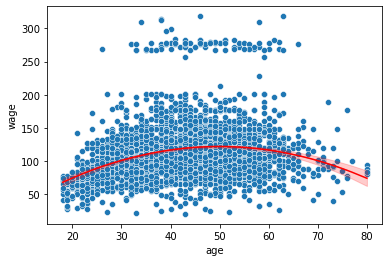

In [14]:
# Quadratic fit 
model2 = smf.ols(formula='wage ~ 1 + age + I(age**2)', data=wage).fit()
sns.scatterplot(x='age', y='wage', data=wage)
sns.lineplot(wage['age'], model2.predict(wage), color='red')

# plot the confidence interval
CI = model2.get_prediction().summary_frame(alpha=0.05)
CI = CI.merge(wage, left_index=True, right_index=True).sort_values('age')
plt.fill_between(CI['age'], CI['mean_ci_lower'], CI['mean_ci_upper'], color='red', alpha=0.2)

In [15]:
rmse(model2.predict(wage), wage['wage'])

39.97261602000191

We notice that the RMSE of the quadratic fit model is lower than that of the linear fit model, which means the polynomial transformation has improved the fit.

**Exercise**: Try a few different polynomial fits and report your results.  

/Users/samitakamath/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


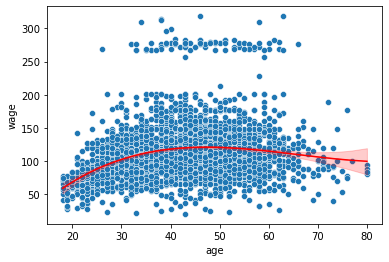

In [16]:
# Degree-3 polynomial
model3 = smf.ols(formula='wage ~ 1 + age + I(age**2) +  I(age**3)', data=wage).fit()
sns.scatterplot(x='age', y='wage', data=wage)
sns.lineplot(wage['age'], model3.predict(wage), color='red')

# plot the confidence interval
CI = model3.get_prediction().summary_frame(alpha=0.05)
CI = CI.merge(wage, left_index=True, right_index=True).sort_values('age')
plt.fill_between(CI['age'], CI['mean_ci_lower'], CI['mean_ci_upper'], color='red', alpha=0.2)

In [17]:
rmse(model3.predict(wage), wage['wage'])

39.90686825091413

/Users/samitakamath/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


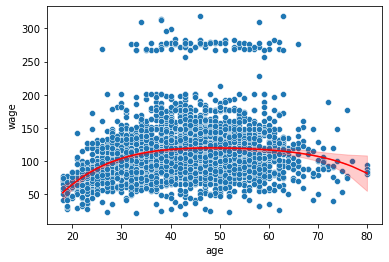

In [18]:
# Degree-4 polynomial
model4 = smf.ols(formula='wage ~ 1 + age + I(age**2) +  I(age**3) +  I(age**4)', data=wage).fit()
sns.scatterplot(x='age', y='wage', data=wage)
sns.lineplot(wage['age'], model4.predict(wage), color='red')

# plot the confidence interval
CI = model4.get_prediction().summary_frame(alpha=0.05)
CI = CI.merge(wage, left_index=True, right_index=True).sort_values('age')
plt.fill_between(CI['age'], CI['mean_ci_lower'], CI['mean_ci_upper'], color='red', alpha=0.2)

In [19]:
rmse(model4.predict(wage), wage['wage'])

39.88150886759823

Above we fit a 3- and 4-degree polynomial to the wage data. Based on visual inspection and the RMSE, we can conclude that the 4-degree polynomial seems to fit the data better than the other models. 

#### Dummy variables

Dummy variables, also known as indicator variables, are created to represent the different categories or levels of a categorical variable. By adding dummy variables to linear regression, we can incorporate categorical information into the regression analysis and estimate the effect of each category on the outcome variable. Each dummy variable represents a specific category and takes the value of 0 or 1, indicating whether an observation belongs to that category or not.

In math terms, adding a dummy variable leads to a model with different intercepts for different levels of the categorical variable.

Let's add a dummy variable for health insurance to our regression.

In [20]:
model3 = smf.ols(formula='wage ~ 1 + age + I(age**2) + health_ins', data=wage).fit()
rmse(model3.predict(wage), wage['wage'])

38.50914318590054

This model can be written as
$wage = \beta_0 + \beta_1age + \beta_2age^2 + \beta_3I_{no\_insurance}$

where $I$ is an indicator variable taking on the value 1 if the observation belongs to the group and 0 otherwise. This results in **2 regression lines with different intercepts** for the groups with insurance and without insurance.

**Interpreting dummy variable coefficients**

Reference category: In regression analysis, one category of a categorical variable is chosen as the reference category for comparison. In the output below, we see a coefficient for `health_ins[T.2. No]`, which implies that the `1. Yes` is the reference category. 

Coefficient interpretation: The coefficient for each dummy variable represents the average difference in the outcome variable when that category relative to the reference category, while holding other variables constant. A positive coefficient indicates that the category has a higher average outcome value compared to the reference category, while a negative coefficient indicates a lower average outcome value. In the output below, we that the coefficient on `health_ins[T.2. No]` is negative, which makes intuitive sense. On average, an individual without health insurance makes -23.73 less in wages as compared to an individual with health insurance, holding age constant.  

In [21]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          9.40e-104
Time:                        13:44:16   Log-Likelihood:                -15210.
No. Observations:                3000   AIC:                         3.043e+04
Df Residuals:                    2996   BIC:                         3.045e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              18.3181    

**Exercise** : The same logic of dummy variables extends to when we have more than 2 categories for a given variable. Add dummy variables for `race` to the regression specification of `model3` and interpret the coefficients of the `race` dummy variables. 

In [22]:
wage['race'].unique()

array(['1. White', '3. Asian', '4. Other', '2. Black'], dtype=object)

In [23]:
model = smf.ols(formula='wage ~ 1 + age + I(age**2) + health_ins + race', data=wage).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     92.98
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.30e-107
Time:                        13:44:17   Log-Likelihood:                -15193.
No. Observations:                3000   AIC:                         3.040e+04
Df Residuals:                    2993   BIC:                         3.044e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              21.1565    

We notice that `1. White` has been encoded as the reference category (the choice of reference category generally happens in alphabetical order). 
Hence, relative to the `1. White` category:
1. On average, people in the `2. Black` category earn -9.3 less in wages, keeping age and health insurance status constant.
2. On average, people in the `3. Asian` category earn 8.9 more in wages, keeping age and health insurance status constant.
3. On average, people in the `4. Other` category earn -14.8 less in wages, keeping age and health insurance status constant.

#### Interaction terms

Interaction terms capture multiplicative effects between predictors, which means that two or more features/variables combined have a significantly larger effect as compared to the sum of the individual variables alone. This allows us to vary the slope of the regression line by group. Remember, that it is always best practice to add the main effects in the regression along with the interaction term i.e., include X1 and X2 as predictors if you're including X1 * X2 as a predictor. 

Let's add an interaction term between `age` and `health_ins` to our regression model and see if it improves the fit.

In [24]:
model4 = smf.ols(formula='wage ~ 1 + age + I(age**2) + health_ins + age*health_ins', data=wage).fit()
rmse(model4.predict(wage), wage['wage'])

38.50505573406515

This model can be written as
$wage = \beta_0 + \beta_1age + \beta_2age^2 + \beta_3I_{no\_insurance} + \beta_4I_{no\_insurance}age +\epsilon$

where $I$ is an indicator variable taking on the value 1 if the observation belongs to the group and 0 otherwise. This results in **2 regression lines with different intercepts and slopes** for the groups with insurance and without insurance.

In [25]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     130.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          9.81e-103
Time:                        13:44:17   Log-Likelihood:                -15209.
No. Observations:                3000   AIC:                         3.043e+04
Df Residuals:                    2995   BIC:                         3.046e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

**Interpreting Interaction term coefficients**

The coefficient of the interaction term (`age:health_ins[T.2. No`) represents the change in the slope of the relationship between the outcome variable and `age` due to the presence of `health_ins[T.2. No]`. The positive coefficient on the interaction term tells us that for a given age, not having health insurance increases wage by 0.103. This might seem counter-intuitive and perhaps indicative of omitted variable bias. However, we note that this coefficient is not signficant (p-value = 0.425), which means we would disregard this effect.

**Exercise**: Experiment with any the feature generating techniques you're curious about and comment on your results.